# Week 11: Deep Dive into pandas — Advanced Data Transformations & Explorations

Welcome!  
In this notebook, we’ll explore powerful pandas features—especially focusing on:
- Using lambda functions to perform custom transformations
- Visualizing complex mathematical functions with pandas and numpy
- Merging and concatenating datasets for flexible data combination
- Converting pandas DataFrames and numpy arrays back and forth—understanding how they relate
- Building examples from simple to advanced scenarios, with plenty of prompts to learn by doing

Let’s unlock some fun with data and math!

---

# 1. Setup: Import core libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

*Try:*  
Run this cell. You are now ready to experiment with pandas and numpy!

---

# 2. Create Data for Mathematical Fun

Let's create a set of data points from a smooth mathematical function that allows us to visualize and transform easily:

In [2]:
# Generate 200 points evenly spread between -pi and pi
x = np.linspace(-np.pi, np.pi, 200)

# Build a DataFrame with multiple functions of x for exploration
df = pd.DataFrame({
    'x': x,                                    # the x values
    'sin_x': np.sin(x),                         # sine of x
    'cos_x': np.cos(x),                         # cosine of x
    'tan_x': np.tan(x),                         # tangent of x (be careful near asymptotes!)
    'x_squared': x**2,                          # x squared
    'abs_x': np.abs(x),                         # absolute value of x
    'exp_x': np.exp(x / 4),                     # scaled exponential
    'sin_x_squared': np.sin(x)**2               # sine squared
})
df.head()

,x,sin_x,cos_x,tan_x,x_squared,abs_x,exp_x,sin_x_squared
0,-3.141593,-1.224647e-16,-1.000000,1.224647e-16,9.869604,3.141593,0.455938,1.499760e-32
1,-3.110019,-3.156855e-02,-0.999502,3.158429e-02,9.672217,3.110019,0.459551,9.965733e-04
2,-3.078445,-6.310563e-02,-0.998007,6.323166e-02,9.476824,3.078445,0.463193,3.982321e-03
3,-3.046871,-9.457981e-02,-0.995517,9.500569e-02,9.283425,3.046871,0.466864,8.945340e-03
4,-3.015297,-1.259597e-01,-0.992035,1.269710e-01,9.092019,3.015297,0.470563,1.586585e-02


**Prompt:**  
- Try creating your own functions, e.g., `np.log1p(np.abs(x))` for a logarithmic curve.  
- Think: how might these functions evolve if you change parameters?  
- Plot them individually to see their shape.

---

# 3. Applying lambda functions to customize data transformations

Lambda functions in pandas are super-powerful for custom calculations.

### a) Create a new column that combines existing ones with a lambda

In [3]:
# Sum of sine and cosine (use apply with lambda)
df['sin_plus_cos'] = df.apply(lambda row: row['sin_x'] + row['cos_x'], axis=1)

*Prompt:*  
- Try creating a new column with `np.abs(np.sin(x) * np.cos(x))`.  
- Or experiment with other operations: e.g., `row['sin_x']**3` or `np.exp(row['x'])`.  
- Calculate a formula involving multiple columns.

---

### b) Visualize the result

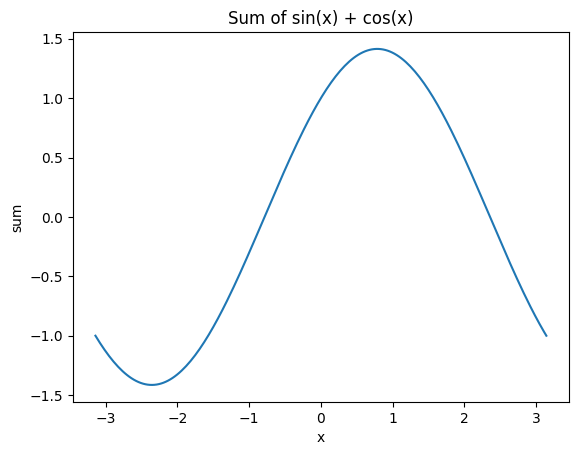

In [4]:
plt.plot(df['x'], df['sin_plus_cos'])
plt.title('Sum of sin(x) + cos(x)')
plt.xlabel('x')
plt.ylabel('sum')
plt.show()

*Prompt:*  
- Plot other combined functions to see complex waves: e.g., `np.sin(2*x) + 0.5*np.cos(4*x)`.

---

# 4. Create and plot complex mathematical functions with lambda

Let’s generate visually interesting functions using lambda for custom formulas:

In [5]:
# Multiply sine by a scaled cosine using apply + lambda
df['modulated_wave'] = df['x'].apply(lambda x: np.sin(x) + 0.5*np.cos(5*x))

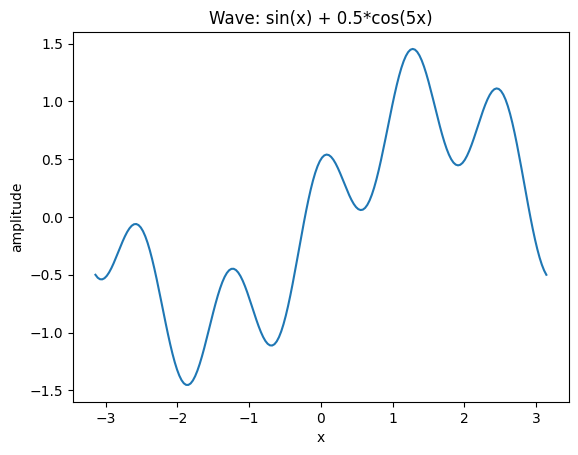

In [6]:
# Plot this complex wave
plt.plot(df['x'], df['modulated_wave'])
plt.title('Wave: sin(x) + 0.5*cos(5x)')
plt.xlabel('x')
plt.ylabel('amplitude')
plt.show()

*Prompt:*  
- Play with different functions: e.g., `np.exp(-x**2) * np.cos(3*x)` for a Gaussian-modulated wave.  
- Can you create a waveform that appears like a "damped oscillation"?

---

# 5. Plotting and visualizing transformations of functions

### a) Visualize `x * sin(x)`, a classic example

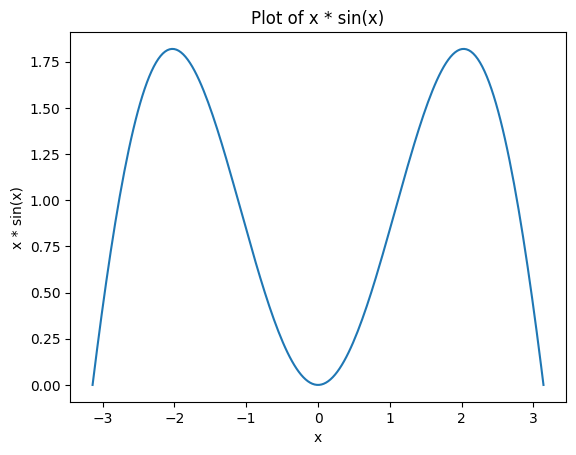

In [7]:
# Apply lambda to generate x*sin(x)
df['x_sin_x'] = df['x'].apply(lambda x: x * np.sin(x))
plt.plot(df['x'], df['x_sin_x'])
plt.title('Plot of x * sin(x)')
plt.xlabel('x')
plt.ylabel('x * sin(x)')
plt.show()

###b) Visualize `np.exp(-x**2)` and its negative

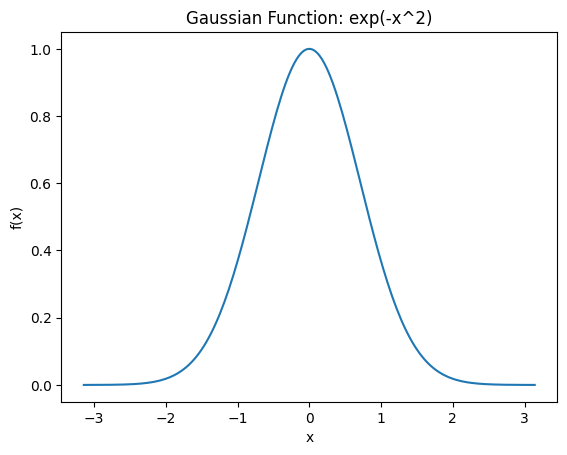

In [8]:
# Create a Gaussian-like curve
df['gaussian'] = np.exp(-df['x']**2)

plt.plot(df['x'], df['gaussian'])
plt.title('Gaussian Function: exp(-x^2)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

*Prompt:*  
- Create your own weighted functions: e.g., `(np.sin(3*x)+np.cos(2*x))/2`.  
- Plot how changing parameters affects shape.

---

# 6. Merging and concatenating datasets

Suppose we generate additional data sources, then combine them:

In [9]:
# New dataset with different functions
df2 = pd.DataFrame({
    'x': x,
    'sin_x': np.sin(x),
    'cos_x_squared': np.cos(x)**2,
    'tan_x': np.tan(x/2)
})

### a) Merging on common column `'x'`

In [10]:
merged_df = pd.merge(df, df2, on='x', suffixes=('_orig', '_new'))
merged_df.head()

,x,sin_x_orig,cos_x,tan_x_orig,x_squared,abs_x,exp_x,sin_x_squared,sin_plus_cos,modulated_wave,x_sin_x,gaussian,sin_x_new,cos_x_squared,tan_x_new
0,-3.141593,-1.224647e-16,-1.000000,1.224647e-16,9.869604,3.141593,0.455938,1.499760e-32,-1.000000,-0.500000,3.847341e-16,0.000052,-1.224647e-16,1.000000,-1.633124e+16
1,-3.110019,-3.156855e-02,-0.999502,3.158429e-02,9.672217,3.110019,0.459551,9.965733e-04,-1.031070,-0.525351,9.817879e-02,0.000063,-3.156855e-02,0.999003,-6.333840e+01
2,-3.078445,-6.310563e-02,-0.998007,6.323166e-02,9.476824,3.078445,0.463193,3.982321e-03,-1.061112,-0.538389,1.942672e-01,0.000077,-6.310563e-02,0.996018,-3.166131e+01
3,-3.046871,-9.457981e-02,-0.995517,9.500569e-02,9.283425,3.046871,0.466864,8.945340e-03,-1.090097,-0.539544,2.881725e-01,0.000093,-9.457981e-02,0.991055,-2.109877e+01
4,-3.015297,-1.259597e-01,-0.992035,1.269710e-01,9.092019,3.015297,0.470563,1.586585e-02,-1.117995,-0.529538,3.798060e-01,0.000113,-1.259597e-01,0.984134,-1.581486e+01


### b) Concatenate datasets vertically or horizontally

In [11]:
# Vertical concatenation (stack rows)
concat_rows = pd.concat([df, df2], axis=0)
print('Vertical concatenation shape:', concat_rows.shape)

# Horizontal concatenation (combine columns)
concat_cols = pd.concat([df, df2], axis=1)
print('Horizontal concatenation shape:', concat_cols.shape)

Vertical concatenation shape: (400, 13)
Horizontal concatenation shape: (200, 16)


*Prompt:*  
- Create your own small datasets, then merge or concatenate in different ways.  
- Explore what happens if datasets have different columns.

---

# 7. Converting pandas DataFrame back and forth to NumPy arrays

**Q:** Why bother with different formats? When do you convert from pandas to numpy, or vice versa?

### a) pandas DataFrame → numpy array

In [12]:
# Take a column from pandas as numpy array
np_array = df['sin_x'].values
print('Array shape:', np_array.shape)

Array shape: (200,)


*Tip:*  
- For multi-dimensional DataFrame, `.values` preserves the shape.
- To get only one row or column, ensure dimensions match; for example:

In [13]:
# For a column (series), shape is (100,)
# For a DataFrame with multiple columns, shape is (rows, columns)

### b) numpy array → pandas DataFrame

In [14]:
# Create a numpy array with multiple columns
np_data = np.linspace(-np.pi, np.pi, 200).reshape(100, 2)
# Convert to DataFrame with labels
df_from_np = pd.DataFrame(np_data, columns=['x', 'sin_ln'])
df_from_np.head()

,x,sin_ln
0,-3.141593,-3.110019
1,-3.078445,-3.046871
2,-3.015297,-2.983724
3,-2.952150,-2.920576
4,-2.889002,-2.857428


*Prompt:*  
- Pick a column from your pandas DataFrame and convert back to numpy array.  
- Create a numpy array of your own functions, then convert to pandas.  
- Observe how shape and labels are maintained or lost.

---

# 8. Fun with complex functions and lambda

Visualize functions with multiple frequencies, phases, or parameters:

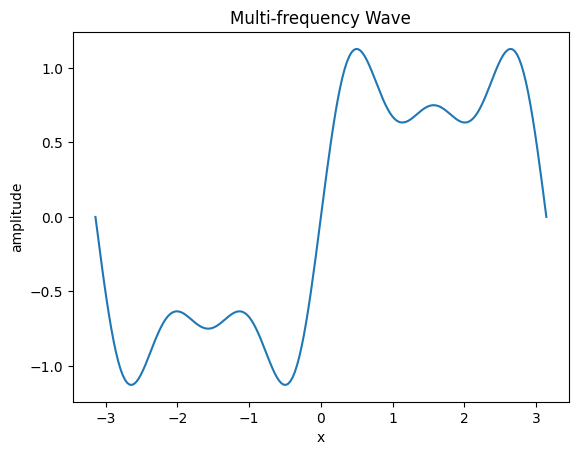

In [15]:
# 3-frequency combined wave
df['multi_wave'] = df['x'].apply(lambda x: np.sin(x) + 0.5*np.sin(3*x) + 0.25*np.sin(5*x))
plt.plot(df['x'], df['multi_wave'])
plt.title('Multi-frequency Wave')
plt.xlabel('x')
plt.ylabel('amplitude')
plt.show()

**Prompt:**  
- Experiment by adding or subtracting components.   Create an oscillation that looks like a complex musical tone!  
- Think of a real-world signal or pattern: can you replicate it?

---

# 9. Summing up: Playing with math, pandas, and numpy

- Lambda functions help you craft custom transformations.
- pandas and numpy complement each other—conversions give flexible options.
- Visualize complex functions or signals easily.

---

# 10. How to convert back and forth between pandas and numpy

### pandas to numpy

In [16]:
# Extract a column to numpy array
array_from_series = df['x'].values
print("Shape:", array_from_series.shape)

Shape: (200,)


### numpy to pandas

In [17]:
# Generate an array
x_array = np.linspace(0, 10, 100)
# Convert to DataFrame
df_x = pd.DataFrame({'x': x_array, 'sin_x': np.sin(x_array)})
df_x.head()

,x,sin_x
0,0.00000,0.000000
1,0.10101,0.100838
2,0.20202,0.200649
3,0.30303,0.298414
4,0.40404,0.393137


*Prompt:*  
- Pick your favorite pandas DataFrame and convert a column into numpy.  
- Generate numpy data based on mathematical functions, then turn it into a pandas DataFrame to analyze structure.

---

# 11. Final challenge: Your own mathematical functions + pandas

Create a new wave:

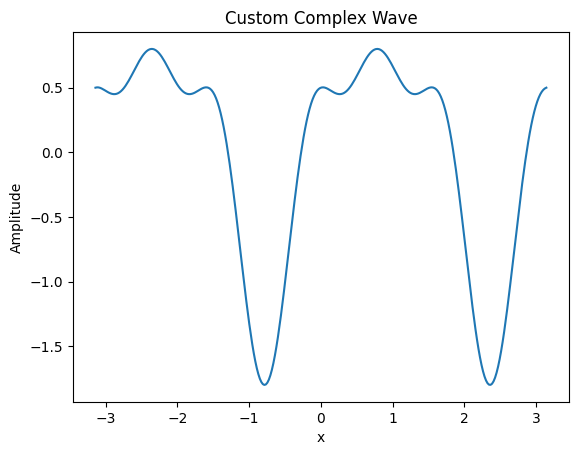

In [18]:
x = np.linspace(-np.pi, np.pi, 300)
df = pd.DataFrame({'x': x})
# Use lambda to create a custom signal
df['custom_wave'] = df['x'].apply(lambda x: np.sin(2*x) + 0.5*np.cos(4*x) - 0.3*np.sin(6*x))
plt.plot(df['x'], df['custom_wave'])
plt.title('Custom Complex Wave')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.show()

**Prompt:**  
- What combination of functions creates interesting patterns?  
- Adjust coefficients or frequencies, and plot the effect.

---

# **Summary and reflection**

You have explored:
- Advanced lambda functions for mathematical transformations
- How to switch between pandas and numpy effectively
- Combining and merging different datasets
- Visualizing complex mathematical signals

Keep experimenting with these tools!

---

# End of demo